## Simulate Cobalt Strike Beacon [Explained](https://www.cobaltstrike.com/help-beacon) see [also](https://labs.sentinelone.com/the-anatomy-of-an-apt-attack-and-cobaltstrike-beacons-encoded-configuration/)
                        
For example, sleep 3000 30, will force Beacon to sleep for 3000 seconds with a 30% jitter percentage
)

In [1]:
import numpy as np
import pandas as pd
from random import randint
from numpy.fft import rfft
import matplotlib.pyplot as plt

### Beacon Parameters

In [2]:
SLEEP_INTERVAL_MINUTES = 50
JITTER_PERCENT = 30
BEACON_LENGTH  = 40

### Algorithm Parameters

In [3]:
WINDOW_SIZE_MINUTES = 60*24
MIN_OBSERVATION = 10
STDEV_THRESHOLD = 2.0

### Emulate Beacon

In [4]:
TS=[0]
for i in range(BEACON_LENGTH):
    cur_w =  SLEEP_INTERVAL_MINUTES - randint(0, JITTER_PERCENT*SLEEP_INTERVAL_MINUTES/100)
    TS.append(TS[-1]+cur_w)

In [5]:
X = list(range(0,TS[-1]+1))
Y = [0]*len(X)
for i in TS:
    Y[i] = 1


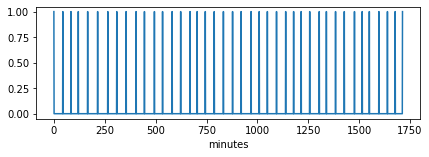

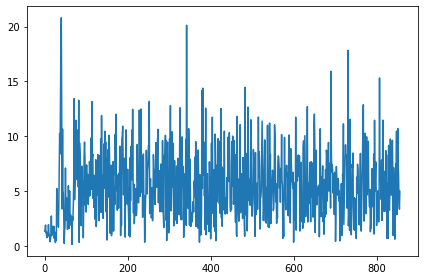

4.41 2.94 3.68 1.73 3.65 6.81 10.26 8.40 13.32 18.09 20.80 11.86 3.38 10.67 5.02 4.77 2.25 0.24 1.43 1.72


In [6]:
plt.subplot( 2, 1, 1 )

# plt.figure(figsize=(15,6)) 
plt.plot( X, Y)
plt.xlabel( 'minutes' ) # plt.legend()
plt.tight_layout()
plt.show()

fft = abs(rfft( Y ))[1:]
plt.plot( fft)

plt.tight_layout()
plt.show()
np.set_printoptions(precision=2)
print(' '.join([f'{x:0.2f}' for x in fft[30:50]]))

### Detection Algorithm: calculate number of calls per time window and then average and standard deviation

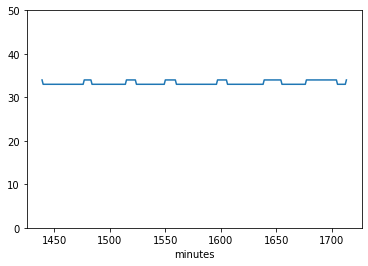

Mean: 33.29, Stdev: 0.46


In [7]:
Z = pd.Series(Y).rolling(WINDOW_SIZE_MINUTES).sum().dropna()
plt.plot(  Z )
plt.xlabel( 'minutes' )
plt.ylim(0, 50)
plt.show()
print(f'Mean: {np.average(Z):.2f}, Stdev: {np.std(Z):.2f}')


In [8]:
C=[0]
cur=0
for ts in TS:
    if ts < len(C)*WINDOW_SIZE:
        cur += 1
    else:
        C.append(cur)
        cur = 0

NameError: name 'WINDOW_SIZE' is not defined

In [ ]:
print(C[2:])

In [ ]:
print(np.average(C[2:]),np.std(C[2:]))

### Test for dections

In [9]:
if (np.std(Z) < STDEV_THRESHOLD and len(Z) > MIN_OBSERVATION):
    print("Beacon detected")

Beacon detected
